In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
market_scaled = scaler.fit_transform(df_market_data)

In [6]:
df_market_data.columns


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [7]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(
    market_scaled,
    columns=df_market_data.columns,
    index=df_market_data.index
)

# Copy the crypto names from the original DataFrame
if 'coin_id' in df_market_data.columns:
    df_market_scaled['coin_id'] = df_market_data['coin_id']

# Set the coin_id column as index

df_market_scaled.reset_index(inplace=True)
# Display the scaled DataFrame
df_market_scaled.head()

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11 + 1))

# Display the list
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using `df_market_data_scaled`
    model.fit(df_market_scaled.drop(columns=['coin_id']))
    
    # Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

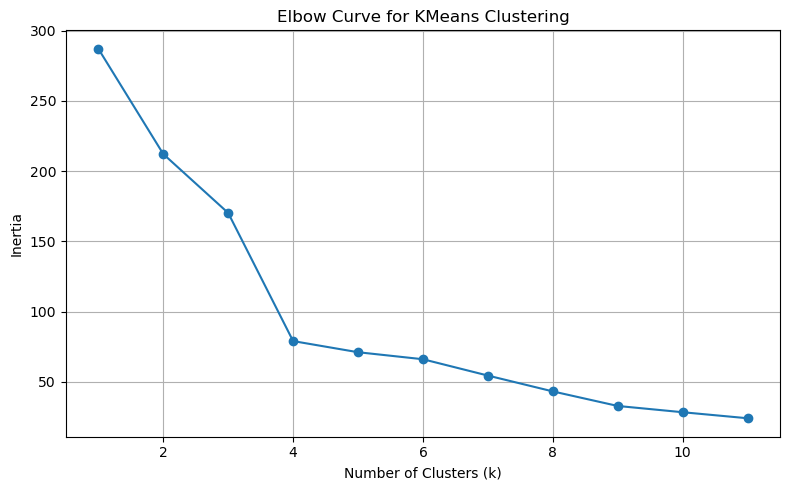

In [11]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for KMeans Clustering")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

In [12]:
# Set your best k value
best_k = 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [13]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=best_k, random_state=42)

In [14]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_scaled.drop(columns='coin_id', errors='ignore'))

c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predicted_clusters = model.predict(df_market_scaled.drop(columns=['coin_id', 'cluster'], errors='ignore'))

# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [16]:
# Create a copy of the scaled DataFrame
df_clusters = df_market_scaled.copy()

df_clusters.head()

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [17]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clusters['predicted_cluster'] = predicted_clusters

# Display the copy of the scaled DataFrame
df_clusters.head()

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
0,bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
1,ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
2,tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
3,ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
4,bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [18]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="predicted_cluster",  # color by cluster
    hover_cols=["coin_name"],  # show coin name on hover
    title="Cryptocurrency Clusters",
    width=800,
    height=500
)

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [20]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_market_scaled.drop(columns=['coin_id', 'cluster', 'predicted_cluster'], errors='ignore'))

df_pca = pd.DataFrame(
    pca_data,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_scaled.index
)
# View the scaled PCA data
df_pca.head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [21]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio per Principal Component:")
print(f"PC1: {explained_variance[0]:.4f}")
print(f"PC2: {explained_variance[1]:.4f}")
print(f"PC3: {explained_variance[2]:.4f}")

Explained Variance Ratio per Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [22]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(
    pca_data,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_scaled.index  
)

# Copy the crypto names from the original scaled DataFrame
if 'coin_id' in df_market_scaled.columns:
    df_pca['coin_id'] = df_market_scaled['coin_id']

# Set the coin_id column as index


# Display the scaled PCA DataFrame
df_pca.head()

,PC1,PC2,PC3,coin_id
0,-0.600667,0.842760,0.461595,bitcoin
1,-0.458261,0.458466,0.952877,ethereum
2,-0.433070,-0.168126,-0.641752,tether
3,-0.471835,-0.222660,-0.479053,ripple
4,-1.157800,2.041209,1.859715,bitcoin-cash


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [23]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [24]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using `df_market_data_pca`
    model.fit(df_pca[['PC1', 'PC2', 'PC3']])
    # Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)
# Create a dictionary with the data to plot the Elbow curve
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(range(1, 12)),
    "inertia": inertia
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901


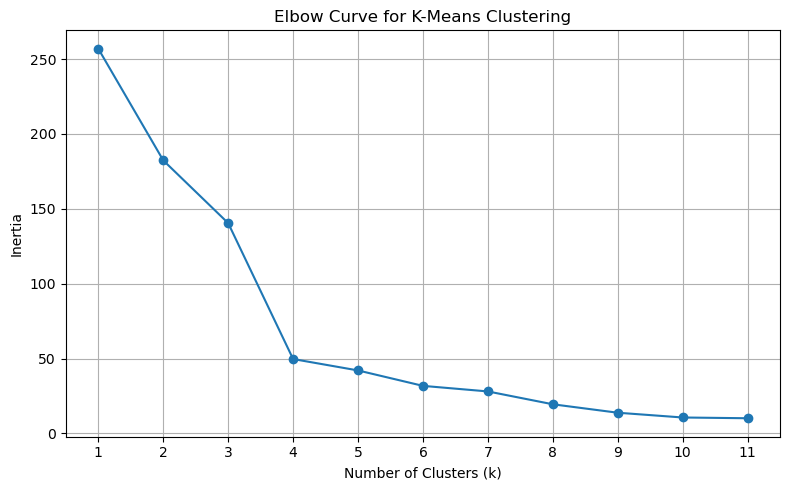

In [26]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o")
plt.title("Elbow Curve for K-Means Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 12))  # ensures all k-values are shown on the x-axis
plt.grid(True)
plt.tight_layout()
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

In [27]:
best_k = 4

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [28]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [29]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca[['PC1', 'PC2', 'PC3']])

c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [30]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_predictions = kmeans_model.predict(df_pca[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values.
print("Predicted cluster labels:")
print(pca_predictions)

Predicted cluster labels:
[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [31]:
# Create a copy of the scaled PCA DataFrame
df_pca_clusters = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters

df_pca_clusters['predicted_cluster'] = pca_predictions

# Display the copy of the scaled PCA DataFrame
df_pca_clusters.head()

,PC1,PC2,PC3,coin_id,predicted_cluster
0,-0.600667,0.842760,0.461595,bitcoin,0
1,-0.458261,0.458466,0.952877,ethereum,0
2,-0.433070,-0.168126,-0.641752,tether,2
3,-0.471835,-0.222660,-0.479053,ripple,2
4,-1.157800,2.041209,1.859715,bitcoin-cash,0


In [32]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_pca_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='predicted_cluster',       # Color points by cluster
    hover_cols=['coin_name'],     # Show coin names on hover
    title='Cryptocurrency Clusters (PCA: PC1 vs PC2)',
    width=800,
    height=500
)

:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [33]:
# Create a list to store inertia values for original data
inertia_original = []

# Loop through k = 1 to 11
for k in range(1, 12):
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the original scaled data (drop non-numeric columns)
    model.fit(df_market_scaled.drop(columns=['coin_id', 'cluster', 'predicted_cluster'], errors='ignore'))
    
    # Store the inertia
    inertia_original.append(model.inertia_)

c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [34]:
# Create a list to hold inertia values for PCA data
inertia_pca = []

# Loop through k = 1 to 11 and compute inertia
for k in range(1, 12):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_pca[['PC1', 'PC2', 'PC3']])  # Only PCA components
    inertia_pca.append(model.inertia_)

c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MeliC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [35]:
# Composite plot to contrast the Elbow curves
elbow_df_original = pd.DataFrame({
    "k": range(1, 12),
    "inertia": inertia_original
})

elbow_df_pca = pd.DataFrame({
    "k": range(1, 12),
    "inertia": inertia_pca
})

In [36]:
print("df_market_scaled columns:", df_market_scaled.columns.tolist())
print("df_pca_clusters columns:", df_pca_clusters.columns.tolist())

df_market_scaled columns: ['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']
df_pca_clusters columns: ['PC1', 'PC2', 'PC3', 'coin_id', 'predicted_cluster']


In [37]:
# Composite plot to contrast the clusters
original_cluster_plot = df_market_scaled.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='coin_id',  
    hover_cols='all',
    title='Original Scaled Data (No Clusters)',
    width=400,
    height=400
)
pca_cluster_plot = df_pca_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='predicted_cluster',  # This column exists ✅
    hover_cols=['coin_id'],
    title='PCA-Reduced Data with KMeans Clusters',
    width=400,
    height=400
)

original_cluster_plot + pca_cluster_plot

:Layout
   .NdOverlay.I  :NdOverlay   [coin_id]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,index,coin_id,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y)
   .NdOverlay.II :NdOverlay   [predicted_cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 

K-Means = Better cluster serparation and easier to visualize.